In [103]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(font='Liberation Serif',
              rc={'figure.figsize': (7.5,3.75),
                  'font.size': 11,
                 })

from pathlib import Path
# from spellchecker import SpellChecker
import string


DATA = Path.cwd().parent / 'data' 
EFCAMDAT = DATA / 'efcamdat_shatz_distro.parquet'

In [22]:
df = pd.read_parquet('../data/efcamdat_shatz_distro.parquet')
df.shape

(723282, 25)

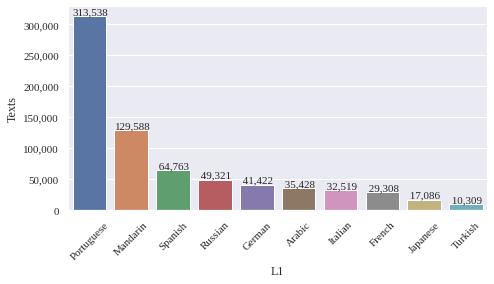

In [111]:
comma_formatter = lambda x, _: f'{int(x):,d}'

g = sns.countplot(x=df.l1,
                    order=df.l1.value_counts().sort_values(ascending=False).index)

g.axes.yaxis.set_major_formatter(comma_formatter)
for p in g.patches:
    g.annotate('{: >7,d}'.format(int(p.get_height())), (p.get_x(), p.get_height()+3000))
    
g.axes.set_xticklabels(fig.get_xticklabels(), rotation=45)
g.set(xlabel='L1', ylabel='Texts')
plt.savefig('../images/texts-by-language-bar.png', dpi=300)

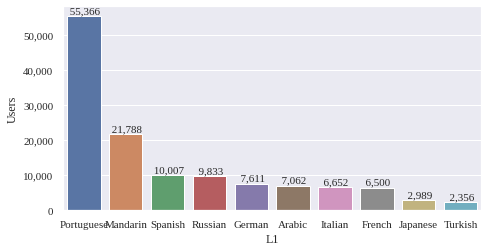

In [112]:
g = sns.barplot(data=df.groupby(['l1']).learner_id.nunique().sort_values(ascending=False).to_frame().reset_index(), x='l1', y='learner_id')
g.axes.yaxis.set_major_formatter(comma_formatter)
for p in g.patches:
    g.annotate('{: >7,}'.format(int(p.get_height())), (p.get_x(), p.get_height()+800))
g.set(xlabel='L1', ylabel='Users')
plt.savefig('../images/users-by-language-bar.png', dpi=300)

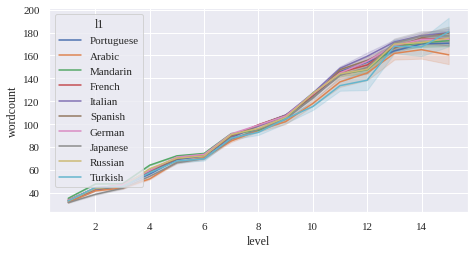

In [113]:
g = sns.lineplot(data=df.reset_index(), x='level', y='wordcount', hue='l1')
plt.show()

In [115]:
def countMisspellings(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    word_list = text.split()
    # find those words that may be misspelled
    misspelled = spell.unknown(word_list)
    return len(misspelled)
spell = SpellChecker()

df['num_misspellings'] = df['text'].apply(lambda x: countMisspellings(x))
df['misspellings_ratio'] = df['num_misspellings']/df['wordcount']

NameError: name 'SpellChecker' is not defined

In [114]:
g = sns.lineplot(data=df.reset_index(), x='level', y='misspellings_ratio')
g.set(title='Spelling Errors by Level in EFCAMDAT',
      ylabel='ratio of misspelled words to total word count',
     )
plt.show()

ValueError: Could not interpret value `misspellings_ratio` for parameter `y`

Text(0.5, 1.0, 'Total Word Count by Level')

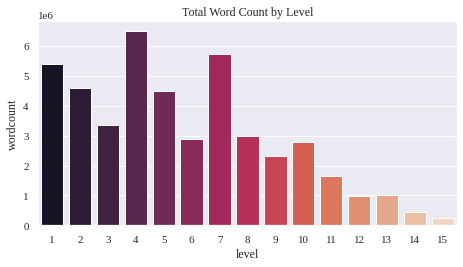

In [109]:
# sns.color_palette("rocket", as_cmap=True)
sns.barplot(data = df.groupby('level').wordcount.sum().to_frame().reset_index(), x='level', y='wordcount', palette='rocket')
plt.title('Total Word Count by Level')

Text(0.5, 1.0, 'Counts of Essays by Level')

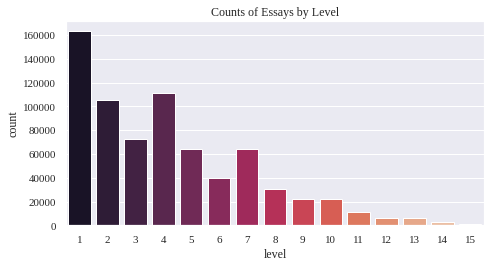

In [110]:
sns.countplot(data = df, x='level', palette='rocket')
plt.title('Counts of Essays by Level')

<AxesSubplot:xlabel='l1', ylabel='misspellings_ratio'>

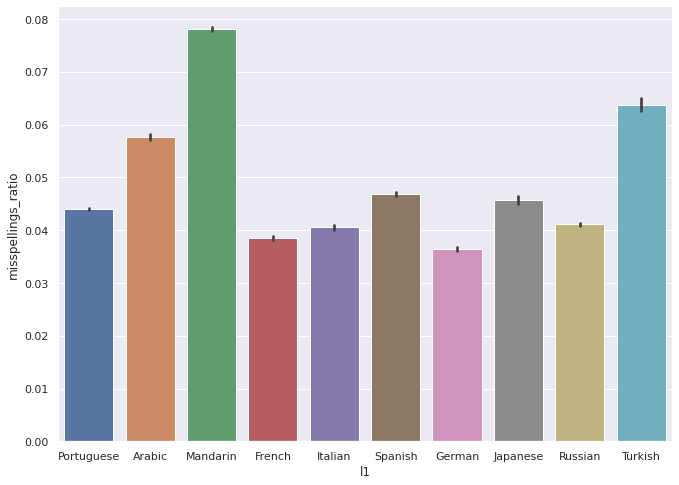

In [97]:
sns.barplot(data=df, x='l1', y='misspellings_ratio')

Text(0.5, 1.0, 'Number of Essays from each L1 by Level')

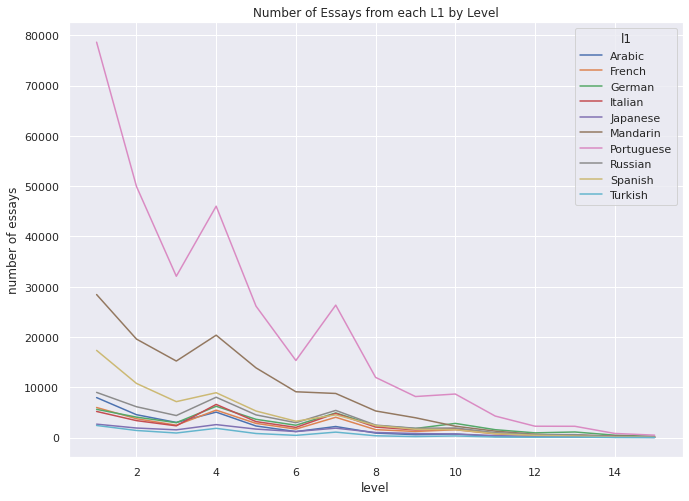

In [106]:
sns.lineplot(data=df.groupby(['l1', 'level']).learner_id.count().reset_index(), x='level', y='learner_id', hue='l1')
plt.ylabel('number of essays')
plt.title('Number of Essays from each L1 by Level')

In [128]:
from statsmodels.formula.api import ols

df.groupby(['level', 'l1']).learner_id.count().reset_index()

model = ols("learner_id ~ l1*level", data=df.groupby(['level', 'l1']).learner_id.count().reset_index())
results = model.fit()

In [129]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             learner_id   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     46.08
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           2.18e-48
Time:                        22:02:21   Log-Likelihood:                -1435.8
No. Observations:                 150   AIC:                             2912.
Df Residuals:                     130   BIC:                             2972.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5524.8667   2027.955      2.724      0.007    1512.801    9536.932
l1[T.French]            -417.8762   2867.961     -0.146      0.884   -6091.794    5256.042
l1[T.German]              38.2000   2867.961      0.013      0.989   -5635.718    5712.118
l1[T.Italian]           -361.7143   2867.961     -0.126      0.900   -6035.632    5312.204
l1[T.Japanese]         -2915.3143   2867.961     -1.017      0.311   -8589.232    2758.604
l1[T.Mandarin]           1.81e+04   2867.961      6.310      0.000    1.24e+04    2.38e+04
l1[T.Portuguese]        5.146e+04   2867.961     17.944      0.000    4.58e+04    5.71e+04
l1[T.Russian]           2410.0857   2867.961      0.840      0.402   -3263.832    8084.004
l1[T.Spanish]           6583.5238   2867.961      2.296      0.023     909.606    1.23e+04
l1[T.Turkish]          -3711.1714   2867.961     -1.294      0.198   -9385.089    1962.746
level                   -446.3750    223.045     -2.001      0.047    -887.643      -5.107
l1[T.French]:level        78.9929    315.434      0.250      0.803    -545.055     703.041
l1[T.German]:level        96.1750    315.434      0.305      0.761    -527.873     720.223
l1[T.Italian]:level       96.2143    315.434      0.305      0.761    -527.833     720.262
l1[T.Japanese]:level     262.5643    315.434      0.832      0.407    -361.483     886.612
l1[T.Mandarin]:level   -1426.5964    315.434     -4.523      0.000   -2050.644    -802.549
l1[T.Portuguese]:level -4064.2679    315.434    -12.885      0.000   -4688.316   -3440.220
l1[T.Russian]:level     -134.4857    315.434     -0.426      0.671    -758.533     489.562
l1[T.Spanish]:level     -527.4821    315.434     -1.672      0.097   -1151.530      96.566
l1[T.Turkish]:level      305.5714    315.434      0.969      0.334    -318.476     929.619
==============================================================================
Omnibus:                      116.863   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3478.100
Skew:                           2.260   Prob(JB):                         0.00
Kurtosis:                      26.153   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
import spacy
nlp = spacy.load("en_core_web_sm")

df['vector'] = df['text'].apply(lambda x: nlp(x).vector)

Text(0.5, 1.0, 'Average Number of Essays Produced per Learner in Each Level')

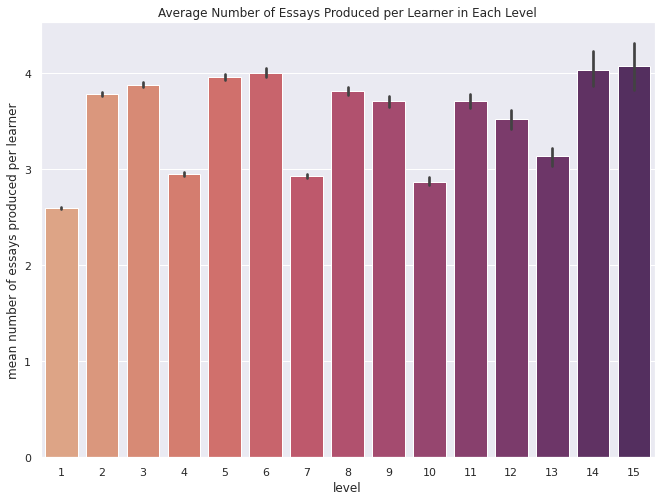

In [143]:
sns.barplot(data=df.groupby(['level','learner_id']).writing_id.count().reset_index(), x='level', y='writing_id', palette='flare')
plt.ylabel('mean number of essays produced per learner')
plt.title('Average Number of Essays Produced per Learner in Each Level')

In [144]:
model = ols('writing_id ~ level', data=df.groupby(['level','learner_id']).writing_id.count().reset_index())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             writing_id   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1822.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:36:13   Log-Likelihood:            -4.7442e+05
No. Observations:              224950   AIC:                         9.488e+05
Df Residuals:                  224948   BIC:                         9.489e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9740      0.007    422.098      0.000       2.960       2.988
level          0.0596      0.001     42.685      0.000       0.057       0.062
==============================================================================
Omnibus:                    15821.096   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12429.764
Skew:                           0.487   Prob(JB):                         0.00
Kurtosis:                       2.386   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""